In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HW3_Airfares_Selected.csv to HW3_Airfares_Selected.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# Read data from a CSV file into a data frame
df = pd.read_csv('HW3_Airfares_Selected.csv')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns
print(df.shape)

  VACATION   SW  S_INCOME  E_INCOME    S_POP    E_POP        SLOT  GATE  \
0       No  Yes     28637     21112  3036732   205711        Free  Free   
1       No   No     26993     29838  3532657  7145897        Free  Free   
2       No   No     30124     29838  5787293  7145897        Free  Free   
3       No  Yes     29260     29838  7830332  7145897  Controlled  Free   
4       No  Yes     29260     29838  7830332  7145897        Free  Free   
5       No  Yes     26046     29838  2230955  7145897        Free  Free   
6       No   No     28637     29838  3036732  7145897        Free  Free   
7      Yes  Yes     26752     29838  1440377  7145897        Free  Free   
8       No  Yes     27211     29838  3770125  7145897        Free  Free   
9       No  Yes     25450     29838  1694803  7145897        Free  Free   

   DISTANCE    FARE  
0       312   64.11  
1       576  174.47  
2       364  207.76  
3       612   85.47  
4       612   85.47  
5       309   56.76  
6      1220  228.00 

<Axes: xlabel='DISTANCE', ylabel='FARE'>

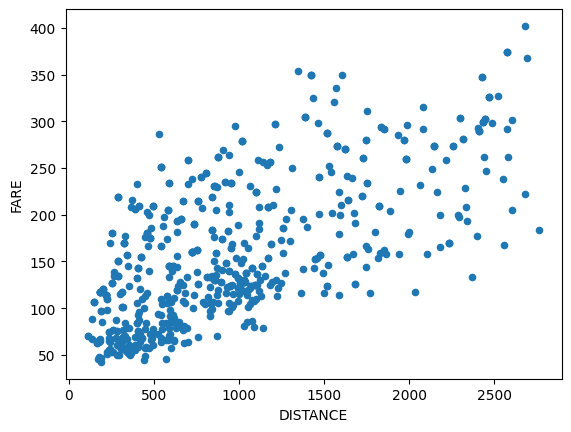

In [ ]:
# Part2 Data Exploration

# Generate a scatterplot based on KM and Price

# A good programing practice:
# We use a set of placeholder variables with pre-determined variable names (e.g., x_var, y_var) to carry problem-specific (or dataset-specific) parameter values (e.g., KM and Price).
# Then we use those placeholder variables as the argument values for a method or an operation.
# By doing this, later, we just need to change the values of those placeholder variables when we have a different problem (or dataset).

# Placeholder variables: x_var, y_var.
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = 'DISTANCE'
y_var = 'FARE'

# Draw the scatterplot
df.plot.scatter(x=x_var, y=y_var, legend=False)

          S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE
S_INCOME  1.000000 -0.140002  0.516779 -0.272888  0.030438  0.208563
E_INCOME -0.140002  1.000000 -0.146626  0.458060  0.179154  0.326739
S_POP     0.516779 -0.146626  1.000000 -0.281467  0.021207  0.145000
E_POP    -0.272888  0.458060 -0.281467  1.000000  0.116757  0.285264
DISTANCE  0.030438  0.179154  0.021207  0.116757  1.000000  0.672640
FARE      0.208563  0.326739  0.145000  0.285264  0.672640  1.000000


<Axes: >

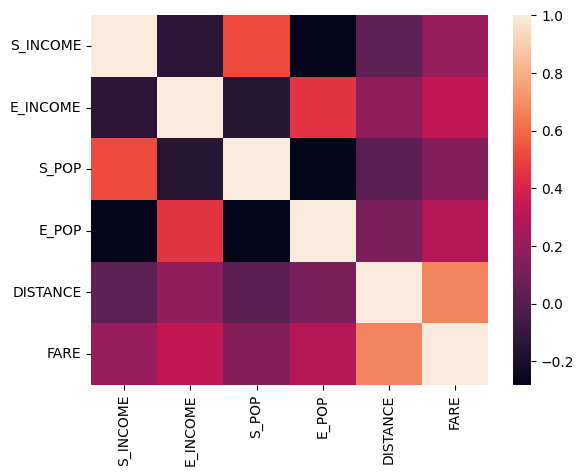

In [ ]:
# Draw a heat map for all the numerical variables in the data frame

# Placeholder variables: df4heatmaps
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
df4heatmaps = df.select_dtypes(include=['number']) # Select only numerical features

# Compute the correlation matrix
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Text(0, 0.5, 'FARE')

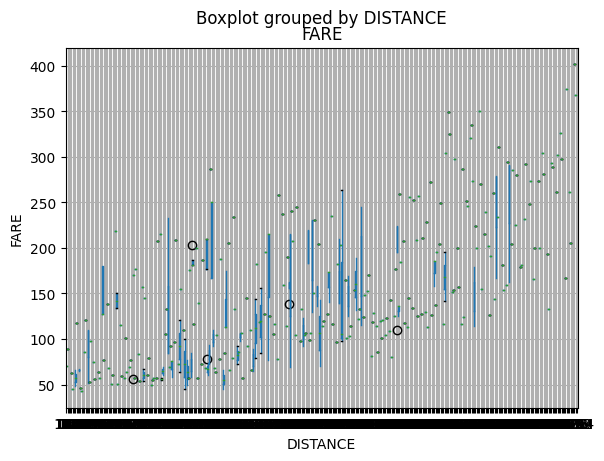

In [ ]:
# Draw a side-by-side box plot to detect if a categorical variable is correlated with a numerical variable


# Placeholder variables: x_var, y_var, df4ssb
# (MODIFY THIS PART OF THE CODE FOR A DIFFERENT PROBLEM)
x_var = 'DISTANCE'
y_var = 'FARE'
df4ssb = df

# Generate the side-by-side box plot. ax is the side-by-side boxplot object
ax = df4ssb.boxplot(column=y_var, by=x_var)
# Set the label on the y-axis using set_ylabel method of the object ax
ax.set_ylabel(y_var)

In [ ]:
# Part 3 Missing Value Imputation
import pandas as pd
import numpy as np

# Read data from a CSV file into a data frame
df = pd.read_csv('HW3_Airfares_Selected.csv')

# Show the number of missing values for each variable in the data frame
df.isnull().sum()

# What if we drop all the observations that contains missing values
print(df.dropna())


# Drop the observations that contain missing dependent variable values
# Placeholder variable is DV
DV = 'FARE'
df_sample1 = df.dropna(subset=[DV])

# print(df_sample1)

# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical
cvar_list = ['VACATION', 'SW', 'SLOT', 'GATE']
nvar_list = ['S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'FARE']

# Impute numerical missing values using sample median
df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = df_sample1[nvar_list].fillna(value=df_sample1[nvar_list].median())


# Get the unique values of the categorical variable Fuel_Type
df_sample2['VACATION'].unique()

# Get the unique values of each categorical variables in the data frame
def column_unique_values(x_column):
  return list(x_column.unique())

df_sample2[cvar_list].apply(column_unique_values)



# pd.np.nan refers to null values in Python
df_sample3 = df_sample2.copy()

# Impute the categorical missing values using sample mode
df_sample4 = df_sample3.copy()
df_sample4[cvar_list] = df_sample3[cvar_list].fillna(value=df_sample3[cvar_list].mode().loc[0,:])

# Check if there is any missing value left
df_sample4.isnull().sum()



    VACATION   SW  S_INCOME  E_INCOME    S_POP    E_POP        SLOT  \
0         No  Yes     28637     21112  3036732   205711        Free   
1         No   No     26993     29838  3532657  7145897        Free   
2         No   No     30124     29838  5787293  7145897        Free   
3         No  Yes     29260     29838  7830332  7145897  Controlled   
4         No  Yes     29260     29838  7830332  7145897        Free   
..       ...  ...       ...       ...      ...      ...         ...   
631      Yes   No     32991     37375  8621121   991717  Controlled   
632      Yes   No     32991     37375  8621121   991717        Free   
633      Yes   No     27994     37375  4948339   991717        Free   
634      Yes   No     31981     37375  4549784   991717        Free   
635      Yes   No     31981     37375  4549784   991717  Controlled   

            GATE  DISTANCE    FARE  
0           Free       312   64.11  
1           Free       576  174.47  
2           Free       364  207.76  

,0
VACATION,0
SW,0
S_INCOME,0
E_INCOME,0
S_POP,0
E_POP,0
SLOT,0
GATE,0
DISTANCE,0
FARE,0


In [ ]:
# Part 4 Variable transformation

# Standardize the numerical variables
df_sample5 = df_sample4.copy()
df_sample5[nvar_list] = (df_sample4[nvar_list] - df_sample4[nvar_list].mean())/df_sample4[nvar_list].std()
print(df_sample4[nvar_list].std())
print(df_sample5[nvar_list].mean())
# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python
df_sample6 = df_sample5.copy()
df_sample6[cvar_list] = df_sample5[cvar_list].astype('category')
df_sample6[nvar_list] = df_sample5[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
# For example, if we choose underscore _, the dummy variable name will be Fuel_Type_Diesel
# If we choose dash -, it will be Fuel_Type-Diesel
df_sample7 = df_sample6.copy()
df_sample7 = pd.get_dummies(df_sample6, prefix_sep='_')

#print(df_sample7.columns.values)
# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['VACATION_No', 'SW_No', 'SLOT_Controlled', 'GATE_Constrained']
df_sample8 = df_sample7.copy()
df_sample8 = df_sample7.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample8.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample8)
print(df)



S_INCOME    3.599478e+03
E_INCOME    4.613079e+03
S_POP       3.012161e+06
E_POP       2.739333e+06
DISTANCE    6.460052e+02
FARE        7.611514e+01
dtype: float64
S_INCOME   -2.625433e-16
E_INCOME    6.703233e-17
S_POP       4.468822e-17
E_POP      -2.234411e-17
DISTANCE    3.910219e-17
FARE       -7.261836e-17
dtype: float64
['S_INCOME' 'E_INCOME' 'S_POP' 'E_POP' 'DISTANCE' 'FARE' 'VACATION_Yes'
 'SW_Yes' 'SLOT_Free' 'GATE_Free']
     S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE  VACATION_Yes  \
0    0.242677 -1.422984 -0.507259 -1.092213 -1.024949 -1.271156         False   
1   -0.214056  0.468595 -0.342618  1.441319 -0.616284  0.178752         False   
2    0.655793  0.468595  0.405893  1.441319 -0.944455  0.616116         False   
3    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529         False   
4    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529         False   
..        ...       ...       ...       ...       ...       ...           ...

In [ ]:
print(df_sample8.columns.values)

['S_INCOME' 'E_INCOME' 'S_POP' 'E_POP' 'DISTANCE' 'FARE' 'VACATION_Yes'
 'SW_Yes' 'SLOT_Free' 'GATE_Free']


In [ ]:
print(df_sample8)

     S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE  VACATION_Yes  \
0    0.242677 -1.422984 -0.507259 -1.092213 -1.024949 -1.271156         False   
1   -0.214056  0.468595 -0.342618  1.441319 -0.616284  0.178752         False   
2    0.655793  0.468595  0.405893  1.441319 -0.944455  0.616116         False   
3    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529         False   
4    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529         False   
..        ...       ...       ...       ...       ...       ...           ...   
631  1.452297  2.102428  1.346689 -0.805279  0.086497 -0.410355          True   
632  1.452297  2.102428  1.346689 -0.805279  0.086497 -0.410355          True   
633  0.064040  2.102428  0.127371 -0.805279 -0.021861 -0.472892          True   
634  1.171701  2.102428 -0.004944 -0.805279 -0.179755 -0.410487          True   
635  1.171701  2.102428 -0.004944 -0.805279 -0.179755 -0.410487          True   

     SW_Yes  SLOT_Free  GAT

In [ ]:
# Check the column names to verify
print(df_sample8.columns)

# Convert dummy columns to integers
df_sample8['VACATION_Yes'] = df_sample8['VACATION_Yes'].astype(int)
df_sample8['SW_Yes'] = df_sample8['SW_Yes'].astype(int)
df_sample8['SLOT_Controlled'] = df_sample8['SLOT_Controlled'].astype(int)

# Make sure to use the exact column name from the DataFrame
if 'GATE_Free' in df_sample8.columns:
    df_sample8['GATE_Free'] = df_sample8['GATE_Free'].astype(int)
else:
    print("Column 'GATE_Free' does not exist in df_sample8.")

print(df_sample8)

Index(['S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'FARE',
       'VACATION_Yes', 'SW_Yes', 'SLOT_Controlled', 'GATE_Free'],
      dtype='object')
     S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE  VACATION_Yes  \
0    0.242677 -1.422984 -0.507259 -1.092213 -1.024949 -1.271156             0   
1   -0.214056  0.468595 -0.342618  1.441319 -0.616284  0.178752             0   
2    0.655793  0.468595  0.405893  1.441319 -0.944455  0.616116             0   
3    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529             0   
4    0.415758  0.468595  1.084157  1.441319 -0.560557 -0.990529             0   
..        ...       ...       ...       ...       ...       ...           ...   
631  1.452297  2.102428  1.346689 -0.805279  0.086497 -0.410355             1   
632  1.452297  2.102428  1.346689 -0.805279  0.086497 -0.410355             1   
633  0.064040  2.102428  0.127371 -0.805279 -0.021861 -0.472892             1   
634  1.171701  2.102428 -0.004944

In [ ]:
# Part 5 Data Partiton

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df_sample8
testpart_size = 0.2

# random_state specifies the seed for random number generator.
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

     S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE  VACATION_Yes  \
594 -0.153491  0.933143 -0.263782  0.493601  0.369776  1.791178         False   
566 -0.885820 -1.582747 -1.117950 -0.887329 -0.955291 -1.459555          True   
377 -0.885820 -0.274727 -1.117950 -1.076205 -0.331457 -1.204415          True   
103 -0.885820 -0.215764 -1.117950 -0.848570  2.770686  0.293316          True   
173  0.576337 -0.730388 -1.505511 -0.806211 -0.741670 -1.321738         False   
..        ...       ...       ...       ...       ...       ...           ...   
129  3.069753 -0.477195 -0.966635 -0.623655  1.496702 -0.044856         False   
144 -1.576475 -0.672292 -1.293596 -0.730255 -0.766438 -1.161848          True   
72   0.415758  0.208248  1.084157 -0.058742 -0.261798  1.098806         False   
235 -0.751356  1.152086 -0.985850  1.979853 -0.606996  0.579855         False   
37   0.415758 -0.528787  1.084157 -0.685843 -0.596160  0.962828         False   

     SW_Yes  SLOT_Free  GAT

In [ ]:
# Part 6 Lasso analysis

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: linear_model.
# Required function name: Lasso, LassoCV

from sklearn.linear_model import Lasso, LassoCV

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'FARE'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Run Lasso with pre-specified penalty level (alpha)
# Placeholder variable: alpha
alpha = 0.01
alpha2 = 0.1
alpha3 = 0.005


# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)
clf2 = Lasso(alpha=alpha2, random_state=1).fit(X,y)
clf3 = Lasso(alpha=alpha3, random_state=1).fit(X,y)


# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Lasso analysis
# Input:  a Lasso model object which is the output of the function Lasso
# Output: the estimated coefficients of the model candidate reported by the input Lasso model object
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

#Print the estimated coefficient of the model candidate reported
print(summary_coef(clf))
print(summary_coef(clf2))
print(summary_coef(clf3))


                     0
S_INCOME      0.022521
E_INCOME      0.062799
S_POP         0.033497
E_POP         0.054358
DISTANCE      0.600097
VACATION_Yes -0.592885
SW_Yes       -0.632651
SLOT_Free    -0.106474
GATE_Free    -0.279766
Intercept     0.646405
                     0
S_INCOME      0.053697
E_INCOME      0.051722
S_POP         0.017274
E_POP         0.081628
DISTANCE      0.514107
VACATION_Yes -0.142356
SW_Yes       -0.334210
SLOT_Free    -0.000000
GATE_Free    -0.000000
Intercept     0.137609
                     0
S_INCOME      0.019010
E_INCOME      0.062325
S_POP         0.030284
E_POP         0.048348
DISTANCE      0.606615
VACATION_Yes -0.618045
SW_Yes       -0.642692
SLOT_Free    -0.136943
GATE_Free    -0.314372
Intercept     0.705382


# Run Lasso at alpha = 0.1, name alpha2, clf2 to differentiate from the first one

In [ ]:

#Run Lasso with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 3

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)
clf_optimal2 = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)
clf_optimal3 = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)


# Display the optimal alpha that yields the final selected model (the best model candidate)
print(clf_optimal.alpha_)
print(clf_optimal2.alpha_)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))
print(summary_coef(clf_optimal2))
print(summary_coef(clf_optimal3))

# Calcuate the ASE over the test partition based on the final selected model
# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition
y_test_predicted = clf_optimal.predict(X_test)
y_test_predicted1 = clf.predict(X_test)

y_test_predicted2 = clf_optimal2.predict(X_test)
y_test_predicted3 = clf2.predict(X_test)


y_test_predicted4 = clf_optimal3.predict(X_test)
y_test_predicted5 = clf3.predict(X_test)

# Get the number of obs in the test partition
n_obs_test = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test = sum((y_test_actual - y_test_predicted)**2)/n_obs_test
ASE_test1 = sum((y_test_actual - y_test_predicted1)**2)/n_obs_test

ASE_test2 = sum((y_test_actual - y_test_predicted2)**2)/n_obs_test
ASE_test3 = sum((y_test_actual - y_test_predicted3)**2)/n_obs_test

ASE_test4 = sum((y_test_actual - y_test_predicted4)**2)/n_obs_test
ASE_test5 = sum((y_test_actual - y_test_predicted5)**2)/n_obs_test

print(f'ASE with alpha = {alpha}: {ASE_test}')
print(f'ASE with alpha = {alpha}: {ASE_test1}')
print(f'ASE with alpha = {alpha2}: {ASE_test2}')
print(f'ASE with alpha = {alpha2}: {ASE_test3}')
print(f'ASE with alpha = {alpha3}: {ASE_test4}')
print(f'ASE with alpha = {alpha3}: {ASE_test5}')

print(ASE_test1)
print(ASE_test2)
print(ASE_test3)
print(ASE_test4)
print(ASE_test5)
# Print the ASE
#print(f'ASE with alpha = {alpha}: {ASE_test}') # Tu's comment: this ASE test is for the Lasso with k-fold cross-validation, not for the Lasso where alpha = 0.01


0.005661624382946696
0.005661624382946696
                     0
S_INCOME      0.019475
E_INCOME      0.062388
S_POP         0.030709
E_POP         0.049143
DISTANCE      0.605753
VACATION_Yes -0.614716
SW_Yes       -0.641363
SLOT_Free    -0.132911
GATE_Free    -0.309793
Intercept     0.697578
                     0
S_INCOME      0.019475
E_INCOME      0.062388
S_POP         0.030709
E_POP         0.049143
DISTANCE      0.605753
VACATION_Yes -0.614716
SW_Yes       -0.641363
SLOT_Free    -0.132911
GATE_Free    -0.309793
Intercept     0.697578
                     0
S_INCOME      0.019475
E_INCOME      0.062388
S_POP         0.030709
E_POP         0.049143
DISTANCE      0.605753
VACATION_Yes -0.614716
SW_Yes       -0.641363
SLOT_Free    -0.132911
GATE_Free    -0.309793
Intercept     0.697578
ASE with alpha = 0.01: 0.32662438509217956
ASE with alpha = 0.01: 0.32721956500281557
ASE with alpha = 0.1: 0.32662438509217956
ASE with alpha = 0.1: 0.431194176105957
ASE with alpha = 0.005: 0.32662